<a href="https://colab.research.google.com/github/armanniki/Digit-Recognizer-using-Deep-learning-CNN-with-Keras/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth =GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train_downloaded = drive.CreateFile({'id': '14_muSweF_kyxEk2bNHTK165FtHC86-8E'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1KuqK65aMiGqYC2ETL5HaEGLk0u56dwl8'})
test_downloaded.GetContentFile('test.csv')  

# Loading the Data
### Frist load the data using pandas Lib in two train and test sets.


In [0]:
# Loading Data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

y_train = train["label"]
x_train = train.drop(labels = ["label"], axis=1)

del train

#g = sns.countplot(y_train)
#y_train.value_counts()

# Normalization
### to change the grayscale range from [0..255] to [0..1]

In [0]:
# Normalizing Data
x_train = x_train / 255.0
test = test / 255.0


# Reshape
### The images are in vector form with 784 elements, now we reshapeinto 28x28x1 matrices.

In [0]:
#Reshaping images in 3 dimensions
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


# Label encoding
### We have 10 labels, 0,1,...,9. They should be encode in one hot vector, for exp : 7-->> [0,0,0,0,0,0,0,1,0,0]

In [17]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)


Using TensorFlow backend.


# Spliting data
### in order to have a better training and more training accuracy, spliting data to train and validation set is good idea. 

In [0]:
#Spliting data into train and validation set
from sklearn.model_selection import train_test_split

random_seed = 2
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)
#g = plt.imshow(x_train[5][:,:,0])

# Train and define CNN model
### CNN layers and kernels and those activation functions and other stuffs could be a very long story, I think, easy google "CNN model in keras" or some thing else :) 

In [19]:
#CNN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization


model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
epochs = 60 # but actually it should be more than 1
batch_size = 86


# Data augmentation
### With these method we make more training images from our train data set using some image preprocessing techniks.

In [0]:
#Data augmentation
from keras.preprocessing.image import ImageDataGenerator

datageneration = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

datageneration.fit(x_train)


In [25]:
#fitting the model
history = model.fit_generator(datageneration.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/60
 - 18s - loss: 0.1422 - acc: 0.9574 - val_loss: 0.1114 - val_acc: 0.9648
Epoch 2/60
 - 18s - loss: 0.1078 - acc: 0.9682 - val_loss: 0.0416 - val_acc: 0.9874
Epoch 3/60
 - 18s - loss: 0.0878 - acc: 0.9745 - val_loss: 0.0389 - val_acc: 0.9890
Epoch 4/60
 - 18s - loss: 0.0801 - acc: 0.9761 - val_loss: 0.0337 - val_acc: 0.9902
Epoch 5/60
 - 18s - loss: 0.0672 - acc: 0.9797 - val_loss: 0.0295 - val_acc: 0.9926
Epoch 6/60
 - 18s - loss: 0.0645 - acc: 0.9803 - val_loss: 0.0246 - val_acc: 0.9919
Epoch 7/60
 - 18s - loss: 0.0588 - acc: 0.9825 - val_loss: 0.0353 - val_acc: 0.9893
Epoch 8/60
 - 18s - loss: 0.0581 - acc: 0.9827 - val_loss: 0.0253 - val_acc: 0.9917
Epoch 9/60
 - 18s - loss: 0.0510 - acc: 0.9847 - val_loss: 0.0514 - val_acc: 0.9879
Epoch 10/60
 - 18s - loss: 0.0517 - acc: 0.9847 - val_loss: 0.0326 - val_acc: 0.9895
Epoch 11/60
 - 18s - loss: 0.0521 - acc: 0.9844 - val_loss: 0.0269 - val_acc: 0.9917
Epoch 12/60
 - 18s - loss: 0.0431 - acc: 0.9867 - val_loss: 0.0281 - val_a

# Confusion Matrix
### a visual represetation of model drawbacks.

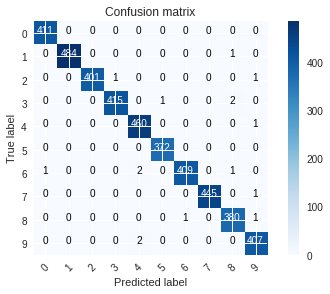

In [26]:
# Confusion matrix 
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# Predicting the test set

In [0]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")


In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

# **Brief but Useful ;)**

In [0]:
import pickle
filename = 'dig_rec_model.sav'
pickle.dump(model, open(filename, 'wb'))
